# Project Title : ETL for Lazada
In this project, we will be performing a complete ETL for a web data of Malaysian website, Lazada.

##PART 1: EXTRACT (8 pt)
a. Pick/choose your dataset - make sure it is legal to be scrape. -1 points

b. scrape your data - identify your data attributes. (at least 1 attribute per member) - 8 points

c. AT LEAST 100 or more record of data are collected. - 1 points

##Step 1: Install chromium, web driver and selenium

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

##Step 2: Import libraries

In [ ]:
import time
import re
import csv
import pandas as pd
from time import sleep
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC

##Step 3: Extract data

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Open browser by webdrive
driver = webdriver.Chrome('chromedriver', options = options)

# To store data
p_name =[]
p_price = []
p_priceb4 = []
p_origin=[]
p_image =[]
p_sold=[]
p_comment=[]
p_link =[]

# for url in urls:
for page in range(1,6):
  url = "https://www.lazada.com.my/shop-smartwatches/?clickTrackInfo=58832903-7518-40c6-afa7-16bfe5a3fb57__10100415__626040162__static__0.09751687221196013__299225__7253&from=hp_categories&item_id=626040162&page="+str(page)+"&sort=pricedesc"   
  try:
    driver.get(url)

    RemainDue = WebDriverWait(driver, 5).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#root")))
    time.sleep(2)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    for item in soup.findAll('div', class_='Bm3ON'):
      #Get product name -Jacqueline
      product_name = item.find('div', class_='RfADt').text
      p_name.append(product_name)
      print(product_name)

      #Get product price after discount -Jacqueline
      product_price = item.find('span', class_='ooOxS').text
      p_price.append(product_price)
      print(product_price)

      #Get product original price -Weiyi
      if item.find('del', class_='ooOxS') == None: 
        #taking the current price
        ori_price = item.find('span', class_='ooOxS').text
        p_priceb4.append(ori_price)
        print(ori_price)
      else:
        #taking the price before discount
        ori_price = item.find('del', class_='ooOxS').text
        p_priceb4.append(ori_price)
        print(ori_price)

      #Get product origin - Weiyi
      for p in item.findAll('span', class_='oa6ri'):
        origin = p.get('title')
        p_origin.append(origin)
        print(origin)

      #Get product image - Kaixuan
      for a in item.findAll('div', class_='_95X4G'):
        for b in a.findAll('a'):
          image_link = b.get('href')
          p_image.append(image_link)
          print(image_link)

      #Get product sold - Kaixuan
      sold = item.find('span', class_='_1cEkb')
      if sold!=None :
        p_sold.append(sold.text)
      else:
        sold = 'No value'
        p_sold.append(sold)

      #Get product link - Reyner
      link = item.find('a', href=True)
      p_link.append(link['href'])

      #Get number of comments - Reyner
      comment = item.find('span', class_='qzqFw')
      #Check if there's comment in the product
      if comment!=None :
        p_comment.append(comment.text)
      else:
        comment = '(0)'
        p_comment.append(comment)  
    
    time.sleep(2)
    WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".ant-pagination-item-link > button"))).click()

    time.sleep(3)
  
  except:
    RemainDue = "BLANK"

driver.close()

LEMFO LEM T 4G 2.86' HD Screen Android Smart Watch (3GB+32GB)
RM1,099.00
RM1,099.00
Selangor
//www.lazada.com.my/products/lemfo-lem-t-4g-286-hd-screen-android-smart-watch-3gb32gb-i626040162.html
COMING SOON K50 SMARTWATCH
RM9,999.00
RM9,999.00
Selangor
//www.lazada.com.my/products/coming-soon-k50-smartwatch-i3350043886.html
[Membership Exclusive] OPPO Band
RM9,999.00
RM9,999.00
Wp Kuala Lumpur
//www.lazada.com.my/products/membership-exclusive-oppo-band-i2818314560.html
Garmin MARQ Golfer ( FREE GIFTS + Update 41,000 Preloaded Golf Courses) Original Set!
RM8,640.00
RM8,640.00
Perak
//www.lazada.com.my/products/garmin-marq-golfer-free-gifts-update-41000-preloaded-golf-courses-original-set-i3317589608.html
Garmin MARQ Golfer ( FREE GIFTS + Update 41,000 Preloaded Golf Courses) Original Set!
RM8,640.00
RM8,640.00
Perak
//www.lazada.com.my/products/garmin-marq-golfer-free-gifts-update-41000-preloaded-golf-courses-original-set-i3288679902.html
GARMIN Descent Mk2i Air-Integrated Dive Compute

##Step 4: Saving scraped data into dataframe

In [ ]:
product_list = list(zip(p_name, p_priceb4, p_price, p_origin, p_image, p_sold, p_link,p_comment))

df = pd.DataFrame(product_list, columns=['Product Name','Price Before Discount','Price After Discount', 'Origin', 'Product Image Link', 'Number of Products Sold', 'Product Links', 'Number of Comments'])


In [ ]:
print(df.to_string())

                                                                                                                                                                                                                       Product Name Price Before Discount Price After Discount           Origin                                                                                                                                                                                                                                                          Product Image Link Number of Products Sold                                                                                                                                                                                                                                                               Product Links Number of Comments
0                                                                                                                                    

##PART 2: TRANSFORM: (8 pt)

a. perform any necessary data processing - ( at least 4 types of data processing or more if the member in your group more than 4).<br> b. perform any data visualisation ( e.g before and after data cleaning)

###1. Check for null value

In [ ]:
df.isnull()
df.isnull().values.any()

False

###2. Check if duplicates exist in the dataframe. If yes, remove the duplicates.

In [ ]:
#Check if there's any duplicated data on the link
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Product Name,Price Before Discount,Price After Discount,Origin,Product Image Link,Number of Products Sold,Product Links,Number of Comments


###3. Clean the data 

In [ ]:
#Remove RM and ',' in Price Before Discount and Price After Discount
df['Price Before Discount'] = df['Price Before Discount'].str.replace('RM', '')
df['Price Before Discount'] = df['Price Before Discount'].str.replace(',', '')
df['Price After Discount'] = df['Price After Discount'].str.replace('RM', '')
df['Price After Discount'] = df['Price After Discount'].str.replace(',', '')

#Remove "// in product image link"
df['Product Image Link'] = df['Product Image Link'].str.replace('//','')

#Remove 'sold' and replace 'no value' to 0
df['Number of Products Sold']=df['Number of Products Sold'].str.replace('sold','')
df['Number of Products Sold']=df['Number of Products Sold'].str.replace('No value','0')

#Remove "// in product links"
df['Product Links'] = df['Product Links'].str.replace('//','')
#Remove "(" and ")" in Number of Comments
df['Number of Comments'] = df['Number of Comments'].str.replace('(','').str.replace(')','')

df

<ipython-input-9-a45605ed4790>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Number of Comments'] = df['Number of Comments'].str.replace('(','').str.replace(')','')


,Product Name,Price Before Discount,Price After Discount,Origin,Product Image Link,Number of Products Sold,Product Links,Number of Comments
0,LEMFO LEM T 4G 2.86' HD Screen Android Smart ...,1099.00,1099.00,Selangor,www.lazada.com.my/products/lemfo-lem-t-4g-286-...,6,www.lazada.com.my/products/lemfo-lem-t-4g-286-...,1
1,COMING SOON K50 SMARTWATCH,9999.00,9999.00,Selangor,www.lazada.com.my/products/coming-soon-k50-sma...,0,www.lazada.com.my/products/coming-soon-k50-sma...,0
2,[Membership Exclusive] OPPO Band,9999.00,9999.00,Wp Kuala Lumpur,www.lazada.com.my/products/membership-exclusiv...,9,www.lazada.com.my/products/membership-exclusiv...,0
3,"Garmin MARQ Golfer ( FREE GIFTS + Update 41,00...",8640.00,8640.00,Perak,www.lazada.com.my/products/garmin-marq-golfer-...,0,www.lazada.com.my/products/garmin-marq-golfer-...,0
4,"Garmin MARQ Golfer ( FREE GIFTS + Update 41,00...",8640.00,8640.00,Perak,www.lazada.com.my/products/garmin-marq-golfer-...,0,www.lazada.com.my/products/garmin-marq-golfer-...,0
...,...,...,...,...,...,...,...,...
156,Apple Watch Series 8 GPS and Cellular Aluminiu...,2299.00,2299.00,Selangor,www.lazada.com.my/products/apple-watch-series-...,6,www.lazada.com.my/products/apple-watch-series-...,0
157,Apple Watch Series 8 (GPS + Cellular) Aluminiu...,2299.00,2299.00,Selangor,www.lazada.com.my/products/apple-watch-series-...,9,www.lazada.com.my/products/apple-watch-series-...,3
158,NEW Garmin Instinct 2 / 2s Solar ONE PIECE ( L...,2299.00,2299.00,Wp Kuala Lumpur,www.lazada.com.my/products/new-garmin-instinct...,10,www.lazada.com.my/products/new-garmin-instinct...,4
159,"Suunto 9 Peak Moss Gray - Ultra thin, small an...",2799.00,2299.00,Wp Kuala Lumpur,www.lazada.com.my/products/suunto-9-peak-moss-...,23,www.lazada.com.my/products/suunto-9-peak-moss-...,7


In [ ]:
df.columns

Index(['Product Name', 'Price Before Discount', 'Price After Discount',
       'Origin', 'Product Image Link', 'Number of Products Sold',
       'Product Links', 'Number of Comments'],
      dtype='object')

In [ ]:
#rename column name for clearer description
df.rename({'Price Before Discount':'Price Before Discount (RM)'}, axis=1, inplace=True)
df.rename({'Price After Discount':'Price After Discount (RM)'}, axis=1, inplace=True)
df.columns

Index(['Product Name', 'Price Before Discount (RM)',
       'Price After Discount (RM)', 'Origin', 'Product Image Link',
       'Number of Products Sold', 'Product Links', 'Number of Comments'],
      dtype='object')

###4. Change Datatype

In [ ]:
df.dtypes

Product Name                  object
Price Before Discount (RM)    object
Price After Discount (RM)     object
Origin                        object
Product Image Link            object
Number of Products Sold       object
Product Links                 object
Number of Comments            object
dtype: object

In [ ]:
#Convert 'Price Before Discount' and 'Price Before Discount' datatype to float
df['Price Before Discount (RM)'] = df['Price Before Discount (RM)'].apply(pd.to_numeric)
df['Price After Discount (RM)'] = df['Price After Discount (RM)'].apply(pd.to_numeric)

#Change data type from object to int
df['Number of Products Sold']=df['Number of Products Sold'].astype("int")

#Change the 'Number of Comments' column into integer data type
df['Number of Comments']=df['Number of Comments'].astype("int")

In [ ]:
df.dtypes

Product Name                   object
Price Before Discount (RM)    float64
Price After Discount (RM)     float64
Origin                         object
Product Image Link             object
Number of Products Sold         int64
Product Links                  object
Number of Comments              int64
dtype: object

###5. Convert to lowercase, remove emoji and punctuation in products' name, remove all extra space to prevent inconsistent data, 

In [ ]:
# Change text to lowercase and remove all extra spaces
df['Product Name'] = df['Product Name'].apply(lambda s: str.lower(s))
df['Origin'] = df['Origin'].apply(lambda s: str.lower(s))
df['Origin'] = df['Origin'].apply(lambda s: str.strip(s))

# Remove emoji
def deEmojify(inputString):
  return inputString.encode('ascii', 'ignore').decode('ascii')
df['Product Name'] = df['Product Name'].apply(lambda s: deEmojify(s))

# Remove punctuation
df['Product Name'] = df['Product Name'].apply(lambda s: " ".join(re.findall('[\w]+',s)))

df

,Product Name,Price Before Discount (RM),Price After Discount (RM),Origin,Product Image Link,Number of Products Sold,Product Links,Number of Comments
0,lemfo lem t 4g 2 86 hd screen android smart wa...,1099.0,1099.0,selangor,www.lazada.com.my/products/lemfo-lem-t-4g-286-...,6,www.lazada.com.my/products/lemfo-lem-t-4g-286-...,1
1,coming soon k50 smartwatch,9999.0,9999.0,selangor,www.lazada.com.my/products/coming-soon-k50-sma...,0,www.lazada.com.my/products/coming-soon-k50-sma...,0
2,membership exclusive oppo band,9999.0,9999.0,wp kuala lumpur,www.lazada.com.my/products/membership-exclusiv...,9,www.lazada.com.my/products/membership-exclusiv...,0
3,garmin marq golfer free gifts update 41 000 pr...,8640.0,8640.0,perak,www.lazada.com.my/products/garmin-marq-golfer-...,0,www.lazada.com.my/products/garmin-marq-golfer-...,0
4,garmin marq golfer free gifts update 41 000 pr...,8640.0,8640.0,perak,www.lazada.com.my/products/garmin-marq-golfer-...,0,www.lazada.com.my/products/garmin-marq-golfer-...,0
...,...,...,...,...,...,...,...,...
156,apple watch series 8 gps and cellular aluminiu...,2299.0,2299.0,selangor,www.lazada.com.my/products/apple-watch-series-...,6,www.lazada.com.my/products/apple-watch-series-...,0
157,apple watch series 8 gps cellular aluminium ca...,2299.0,2299.0,selangor,www.lazada.com.my/products/apple-watch-series-...,9,www.lazada.com.my/products/apple-watch-series-...,3
158,new garmin instinct 2 2s solar one piece luffy...,2299.0,2299.0,wp kuala lumpur,www.lazada.com.my/products/new-garmin-instinct...,10,www.lazada.com.my/products/new-garmin-instinct...,4
159,suunto 9 peak moss gray ultra thin small and t...,2799.0,2299.0,wp kuala lumpur,www.lazada.com.my/products/suunto-9-peak-moss-...,23,www.lazada.com.my/products/suunto-9-peak-moss-...,7


###6. Extract brand from product name

In [ ]:
regex_lists = r'(garmin)|(apple)|(huawei)|(oppo)|(suunto)'
s = df['Product Name'].str.extract(regex_lists, expand=True)
s

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,oppo,NaN
3,garmin,NaN,NaN,NaN,NaN
4,garmin,NaN,NaN,NaN,NaN
...,...,...,...,...,...
156,NaN,apple,NaN,NaN,NaN
157,NaN,apple,NaN,NaN,NaN
158,garmin,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN,suunto


In [ ]:
df['Brand'] = s[0].fillna(s[1]).fillna(s[2]).fillna(s[3]).fillna(s[4]).fillna('others')
df

,Product Name,Price Before Discount (RM),Price After Discount (RM),Origin,Product Image Link,Number of Products Sold,Product Links,Number of Comments,Brand
0,lemfo lem t 4g 2 86 hd screen android smart wa...,1099.0,1099.0,selangor,www.lazada.com.my/products/lemfo-lem-t-4g-286-...,6,www.lazada.com.my/products/lemfo-lem-t-4g-286-...,1,others
1,coming soon k50 smartwatch,9999.0,9999.0,selangor,www.lazada.com.my/products/coming-soon-k50-sma...,0,www.lazada.com.my/products/coming-soon-k50-sma...,0,others
2,membership exclusive oppo band,9999.0,9999.0,wp kuala lumpur,www.lazada.com.my/products/membership-exclusiv...,9,www.lazada.com.my/products/membership-exclusiv...,0,oppo
3,garmin marq golfer free gifts update 41 000 pr...,8640.0,8640.0,perak,www.lazada.com.my/products/garmin-marq-golfer-...,0,www.lazada.com.my/products/garmin-marq-golfer-...,0,garmin
4,garmin marq golfer free gifts update 41 000 pr...,8640.0,8640.0,perak,www.lazada.com.my/products/garmin-marq-golfer-...,0,www.lazada.com.my/products/garmin-marq-golfer-...,0,garmin
...,...,...,...,...,...,...,...,...,...
156,apple watch series 8 gps and cellular aluminiu...,2299.0,2299.0,selangor,www.lazada.com.my/products/apple-watch-series-...,6,www.lazada.com.my/products/apple-watch-series-...,0,apple
157,apple watch series 8 gps cellular aluminium ca...,2299.0,2299.0,selangor,www.lazada.com.my/products/apple-watch-series-...,9,www.lazada.com.my/products/apple-watch-series-...,3,apple
158,new garmin instinct 2 2s solar one piece luffy...,2299.0,2299.0,wp kuala lumpur,www.lazada.com.my/products/new-garmin-instinct...,10,www.lazada.com.my/products/new-garmin-instinct...,4,garmin
159,suunto 9 peak moss gray ultra thin small and t...,2799.0,2299.0,wp kuala lumpur,www.lazada.com.my/products/suunto-9-peak-moss-...,23,www.lazada.com.my/products/suunto-9-peak-moss-...,7,suunto


###Data Visualisation

In [ ]:
# Import libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

####Histogram

1. Price Before Discount (RM)

(array([  1., 112.,  40.,   4.,   4.]),
 array([    0,  2000,  4000,  6000,  8000, 10000]),
 <a list of 5 Patch objects>)

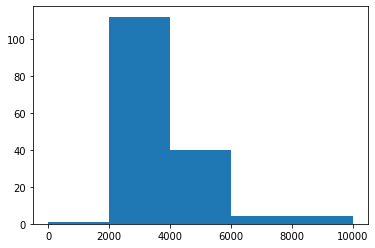

In [ ]:
bins = [0, 2000, 4000, 6000, 8000, 10000]
plt.hist(df['Price Before Discount (RM)'], bins)

2. Price After Discount (RM)

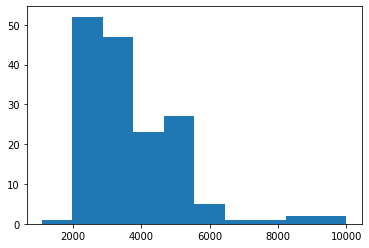

In [ ]:
x = df['Price After Discount (RM)']
plt.hist(x, bins=10)
plt.show()

####Bar Chart

1. Origin

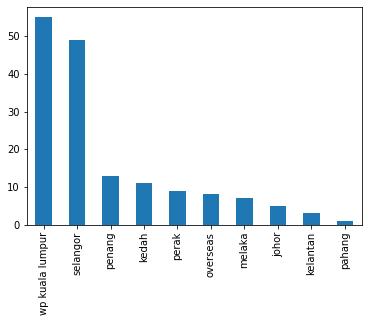

In [ ]:
df["Origin"].value_counts().plot(kind="bar")

2. Brand

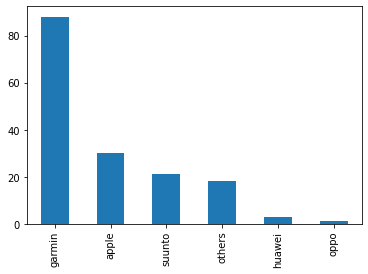

In [ ]:
df["Brand"].value_counts().plot(kind="bar")

####Boxplot

1. Price Before Discount (RM)

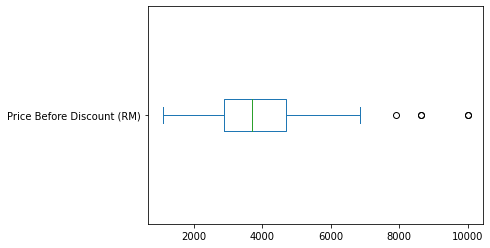

In [ ]:
df['Price Before Discount (RM)'].plot(kind='box', vert=False)

2. Price After Discount (RM)

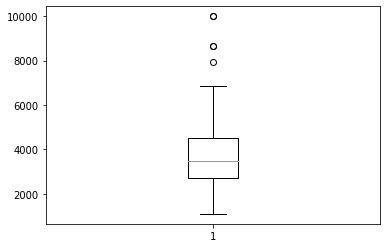

In [ ]:
m = df['Price After Discount (RM)']
plt.boxplot(m)
plt.show()

####Scatterplot

1. Price After Discount (RM) and Number of Sold

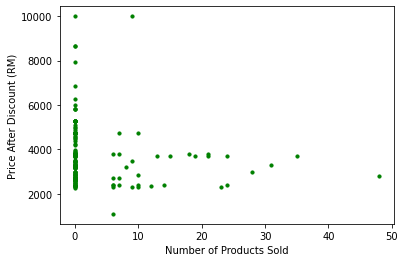

In [ ]:
df.plot.scatter(x='Number of Products Sold', y='Price After Discount (RM)', s=10, c='green')

2. Price After Discount (RM) and Origin

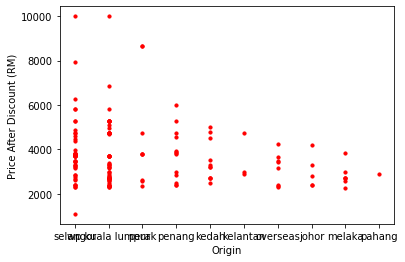

In [ ]:
df.plot.scatter(x='Origin', y ='Price After Discount (RM)',s=10, c='red')

3. Product Sold and Number of Comments

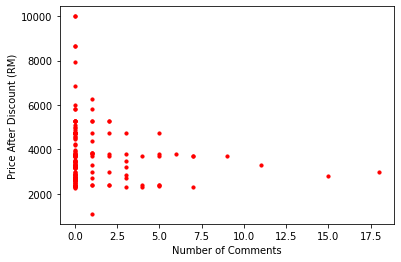

In [ ]:
df.plot.scatter(x='Number of Comments', y='Price After Discount (RM)', s=10, c='red')

4. Price After Discount (RM) and Brand

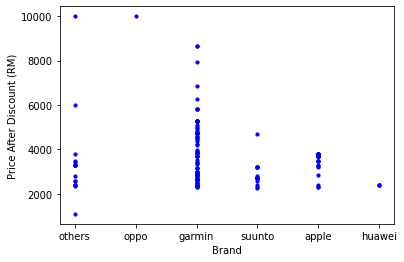

In [ ]:
df.plot.scatter(x='Brand', y='Price After Discount (RM)', s=10, c='blue')

##PART 3: LOAD (2 pt)

Save your clean data into any types of file ( e.g .csv ) that can be read by pandas.

In [ ]:
df.to_csv('output.csv', index=False, encoding='utf-8')